In [1]:
! pip install yfinance ta

import yfinance as yf
import pandas as pd

# Fetch historical data (5+ years) and recent real-time update
ticker = yf.Ticker("TCS.NS")
df = ticker.history(period="5y", interval="1d", auto_adjust=False)

# Reset index and clean
df.reset_index(inplace=True)
print("Sample rows:\n", df.tail())

# Save locally
df.to_csv("TCS_NSE_history.csv", index=False)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Sample rows:
                           Date         Open         High          Low  \
1235 2025-06-09 00:00:00+05:30  3400.000000  3434.000000  3390.899902   
1236 2025-06-10 00:00:00+05:30  3440.000000  3485.800049  3423.199951   
1237 2025-06-11 00:00:00+05:30  3470.000000  3489.000000  3449.100098   
1238 2025-06-12 00:00:00+05:30  3471.899902  3474.699951  3423.199951   
1239 2025-06-13 00:00:00+05:30  3393.199951  3450.500000  3393.199951   

            Close    Adj Close   Volume  Dividends  Stock Splits  
1235  3421.899902  3421.899902  1718678        0.0           0.0  
1236  3462.899902  3462.899902  2419874        0.0           0.0  
1237  3471.899902  3471.899902  2847013        0.0           0.0  
1238  3434.199951  3434.199951  4060134        0.0           0.0  
1239  3445.699951  3445.699951  2178493        0.0           0.0  


In [1]:
! pip install Flask

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load the saved data
df = pd.read_csv("TCS_NSE_history.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Check basic info and nulls
print(df.info())
print("\nMissing Values (%):\n", df.isna().mean() * 100)

# Drop rows with missing values if any
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   Date          1240 non-null   datetime64[ns, UTC+05:30]
 1   Open          1240 non-null   float64                  
 2   High          1240 non-null   float64                  
 3   Low           1240 non-null   float64                  
 4   Close         1240 non-null   float64                  
 5   Adj Close     1240 non-null   float64                  
 6   Volume        1240 non-null   int64                    
 7   Dividends     1240 non-null   float64                  
 8   Stock Splits  1240 non-null   float64                  
dtypes: datetime64[ns, UTC+05:30](1), float64(7), int64(1)
memory usage: 87.3 KB
None

Missing Values (%):
 Date            0.0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close      

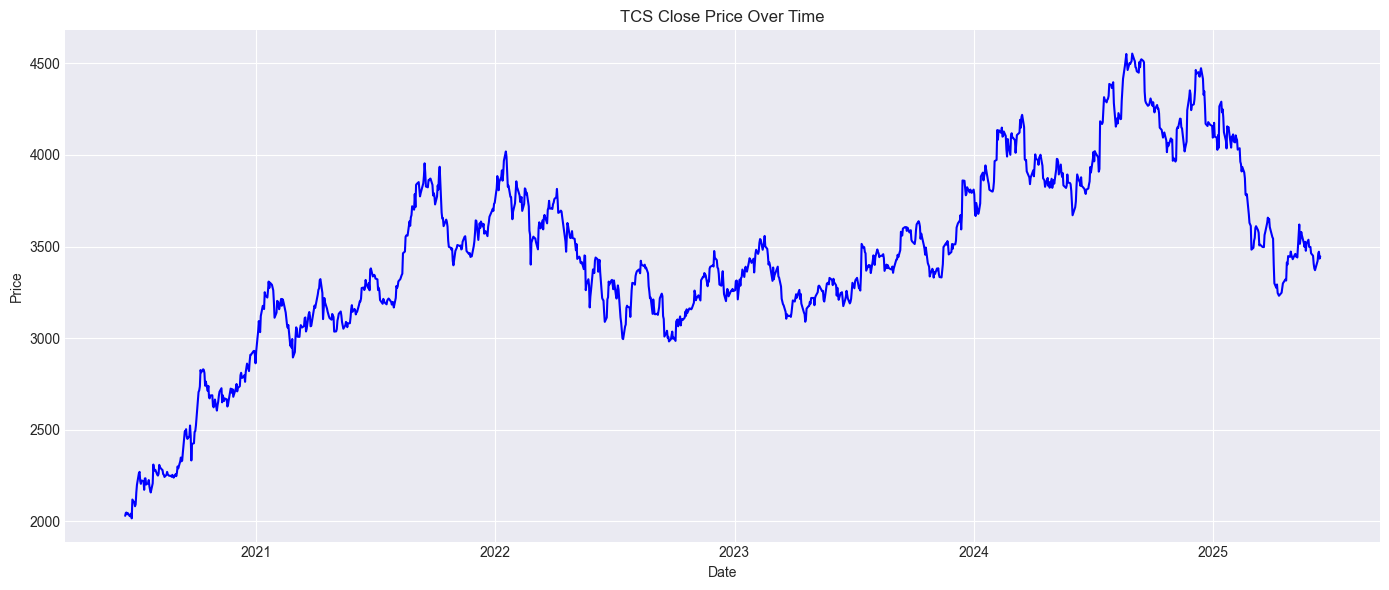

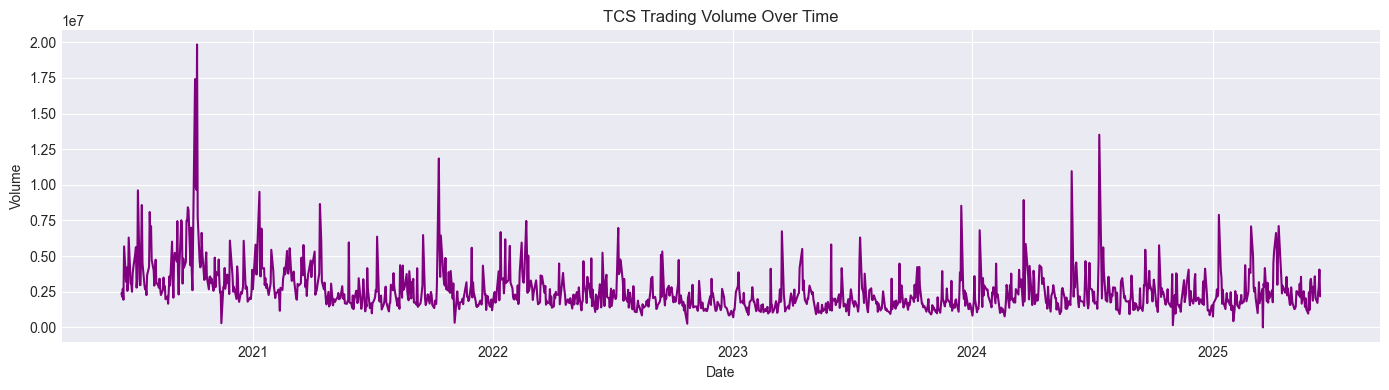

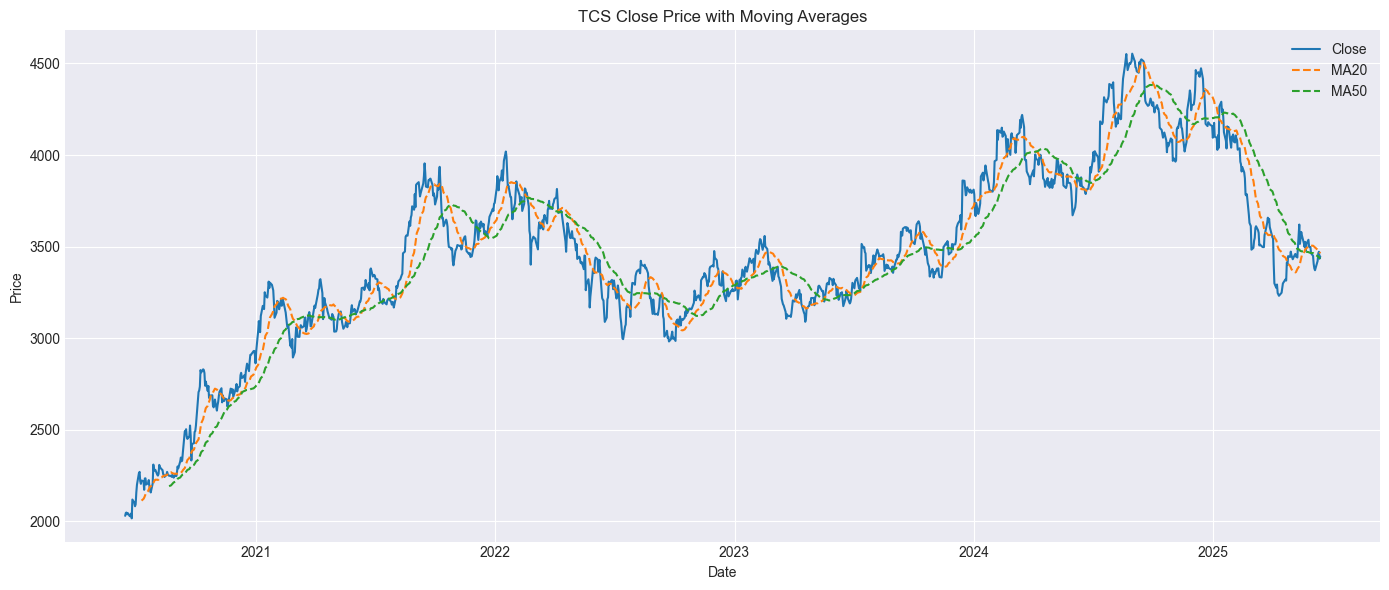

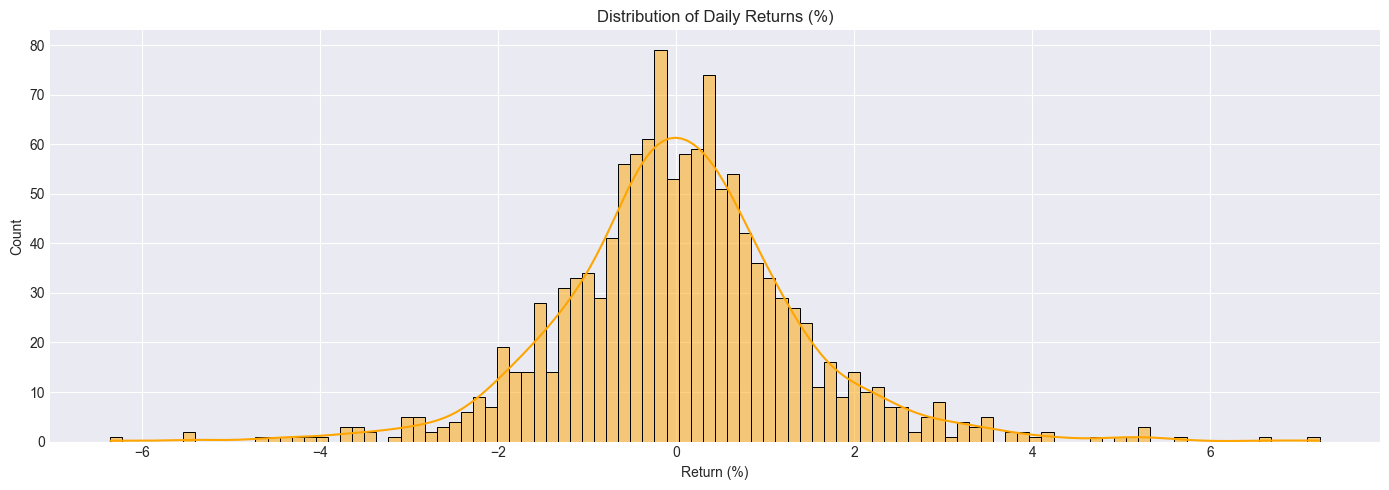

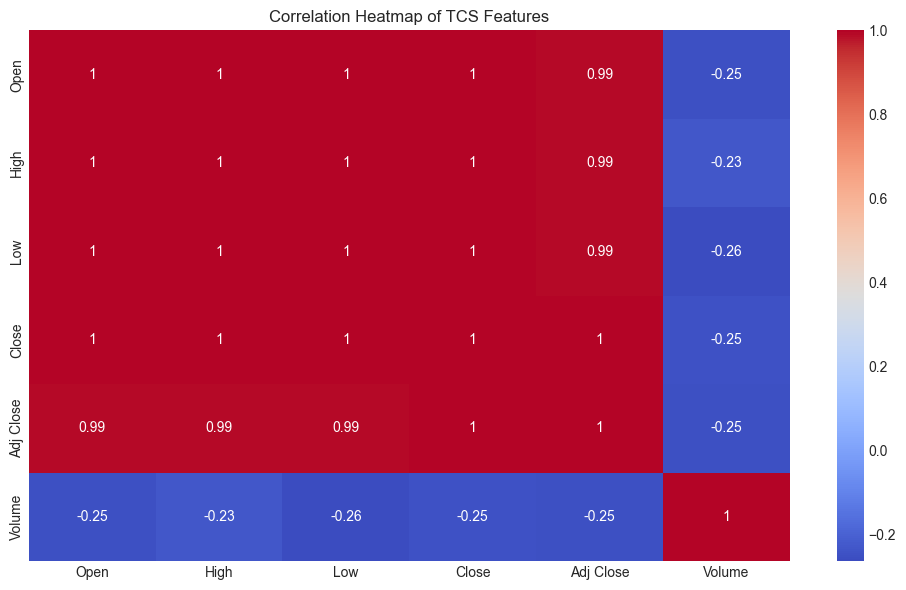

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")

# Plot Close Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], color='blue')
plt.title("TCS Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Volume over time
plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["Volume"], color='purple')
plt.title("TCS Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

# Moving Averages
df["MA20"] = df["Close"].rolling(window=20).mean()
df["MA50"] = df["Close"].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["MA20"], label="MA20", linestyle='--')
plt.plot(df["Date"], df["MA50"], label="MA50", linestyle='--')
plt.title("TCS Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

# Daily Returns
df["Daily Return (%)"] = df["Close"].pct_change() * 100

plt.figure(figsize=(14, 5))
sns.histplot(df["Daily Return (%)"].dropna(), bins=100, kde=True, color="orange")
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Return (%)")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of TCS Features")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Feature Engineering
df["Return"] = df["Close"].pct_change()
df["MA7"] = df["Close"].rolling(window=7).mean()
df["MA21"] = df["Close"].rolling(window=21).mean()
df["STD21"] = df["Close"].rolling(window=21).std()
df["EMA"] = df["Close"].ewm(span=20, adjust=False).mean()
df["Momentum"] = df["Close"] - df["Close"].shift(1)
df.dropna(inplace=True)

# Features and Target
features = ["Open", "High", "Low", "Volume", "Return", "MA7", "MA21", "STD21", "EMA", "Momentum"]
target = "Close"

X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("🔍 Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔍 Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Random Forest MAE: {mae:.2f}")
print(f"📈 Random Forest R² Score: {r2:.4f}")


📉 Random Forest MAE: 76.39
📈 Random Forest R² Score: 0.8840


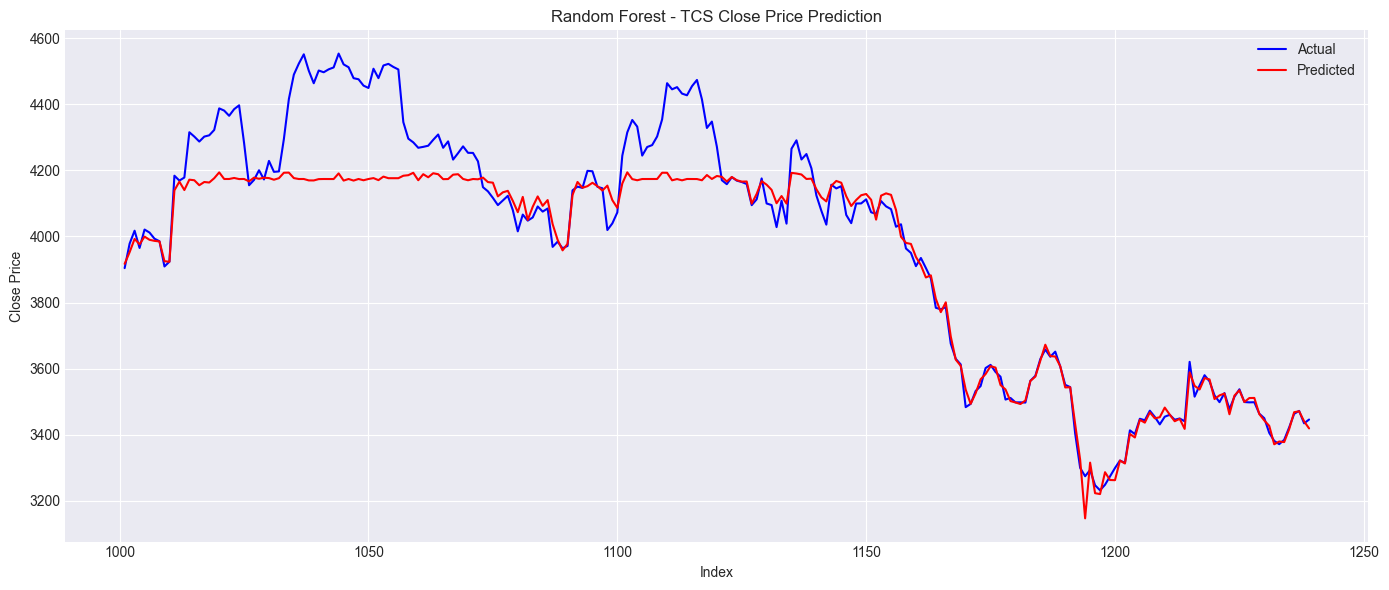

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label="Actual", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted", color='red')
plt.title("Random Forest - TCS Close Price Prediction")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pickle

with open("tcs_rf_best_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)


C:\Users\USER\AppData\Local\Temp\ipykernel_384\3890774506.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


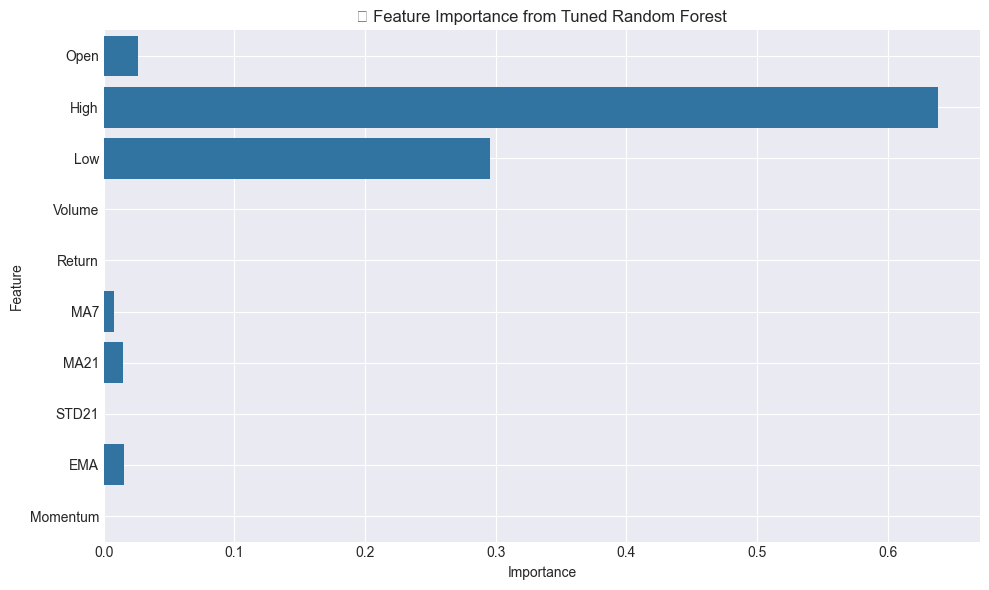

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("🔍 Feature Importance from Tuned Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


tcs live - analysis
tcs nse history - dataset
tcs_rf_best_model - pickle file
